# Plotting the Fraction of Dark Matter from Observational Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

def plot_median(xdata, ydata, label, color):

    bins = np.arange(7, 14, 0.25)
    bins = 10 ** bins
    num_bins = len(bins)
    indx = np.digitize(xdata, bins)
    x_medians = np.array([np.median(xdata[indx == idx]) for idx in np.arange(num_bins) if len(xdata[indx == idx]) > 2])
    y_medians = np.array([np.median(ydata[indx == idx]) for idx in np.arange(num_bins) if len(xdata[indx == idx]) > 2])
    ylo = np.array([np.percentile(ydata[indx == idx],16) for idx in np.arange(num_bins) if len(xdata[indx == idx]) > 2])
    yhi = np.array([np.percentile(ydata[indx == idx],84) for idx in np.arange(num_bins) if len(xdata[indx == idx]) > 2])
    plt.plot(x_medians, y_medians, '-', lw=4, color='white')
    plt.plot(x_medians, y_medians, '-', lw=2, color=color, zorder=100)
    plt.fill_between(x_medians, yhi, ylo, color=color, alpha=0.2)


In [8]:
sparc = pd.read_csv('dataset/SPARC.csv').to_numpy()
atlas3D = pd.read_csv('dataset/ATLAS3D.csv').to_numpy()
barnabe = pd.read_csv('dataset/BARNABE11.csv').to_numpy()
manga = pd.read_csv('dataset/MANGA.csv').to_numpy()
reyes = pd.read_csv('dataset/Reyes2011.csv').to_numpy()
pizagno = pd.read_csv('dataset/Pizagno2007.csv').to_numpy()
slacs = pd.read_csv('dataset/Shajib21.csv').to_numpy()
Yang = pd.read_csv('dataset/YANG24.csv').to_numpy()
sparc = pd.read_csv('dataset/SPARC.csv').to_numpy()
atlas3D = pd.read_csv('dataset/ATLAS3D.csv').to_numpy()
barnabe = pd.read_csv('dataset/BARNABE11.csv').to_numpy()
manga = pd.read_csv('dataset/MANGA.csv').to_numpy()
reyes = pd.read_csv('dataset/Reyes2011.csv').to_numpy()
pizagno = pd.read_csv('dataset/Pizagno2007.csv').to_numpy()
slacs = pd.read_csv('dataset/Shajib21.csv').to_numpy()
Yang = pd.read_csv('dataset/YANG24.csv').to_numpy()


sparc_mass = sparc[:,1]
sparc_Reff = sparc[:,2]
sparc_fDM = sparc[:,3]
sparc_ErrorfDM = sparc[:,4]
Q = sparc[:,5]
select = np.where(Q==1)[0]
sparc_mass = sparc_mass[select]
sparc_fDM = sparc_fDM[select]
sparc_ErrorfDM = sparc_ErrorfDM[select]
sparc_Reff = sparc_Reff[select]


manga_mass = manga[:,2]
manga_fDM = manga[:,4]
manga_Reff= manga[:,3]
select = np.where(manga_fDM>0)[0]
manga_mass = manga_mass[select]
manga_fDM = manga_fDM[select]
manga_Reff = manga_Reff[select]

atlas3D_mass = atlas3D[:,1]
atlas3D_fDM = atlas3D[:,3]
atlas3D_Reff = atlas3D[:,2]
Q = atlas3D[:,5]
select = np.where((Q>=3) & (atlas3D_fDM>0))[0]
atlas3D_mass = atlas3D_mass[select]
atlas3D_fDM = atlas3D_fDM[select]
atlas3D_Reff = atlas3D_Reff[select]


barnabe_mass = banarbe[:,1]
barnabe_fDM = banarbe[:,2]
barnabe_Reff = banarbe[:,-1]

tortora_mass = tortora[:,0]
tortora_fDM = tortora[:,1]

reyes_mass = reyes[:,1]
reyes_Reff = reyes[:,2]
reyes_fDM = reyes[:,3]

pizagno_mass = pizagno[:,1]
pizagno_Reff = pizagno[:,2]
pizagno_fDM = pizagno[:,3]


Yang_mass = Yang[:,1]
Yang_Reff = Yang[:,4]
Yang_fDM = Yang[:,2]

slacs_mass = slacs[:,1]
slacs_Reff = slacs[:,2]
slacs_fDM = slacs[:,3]


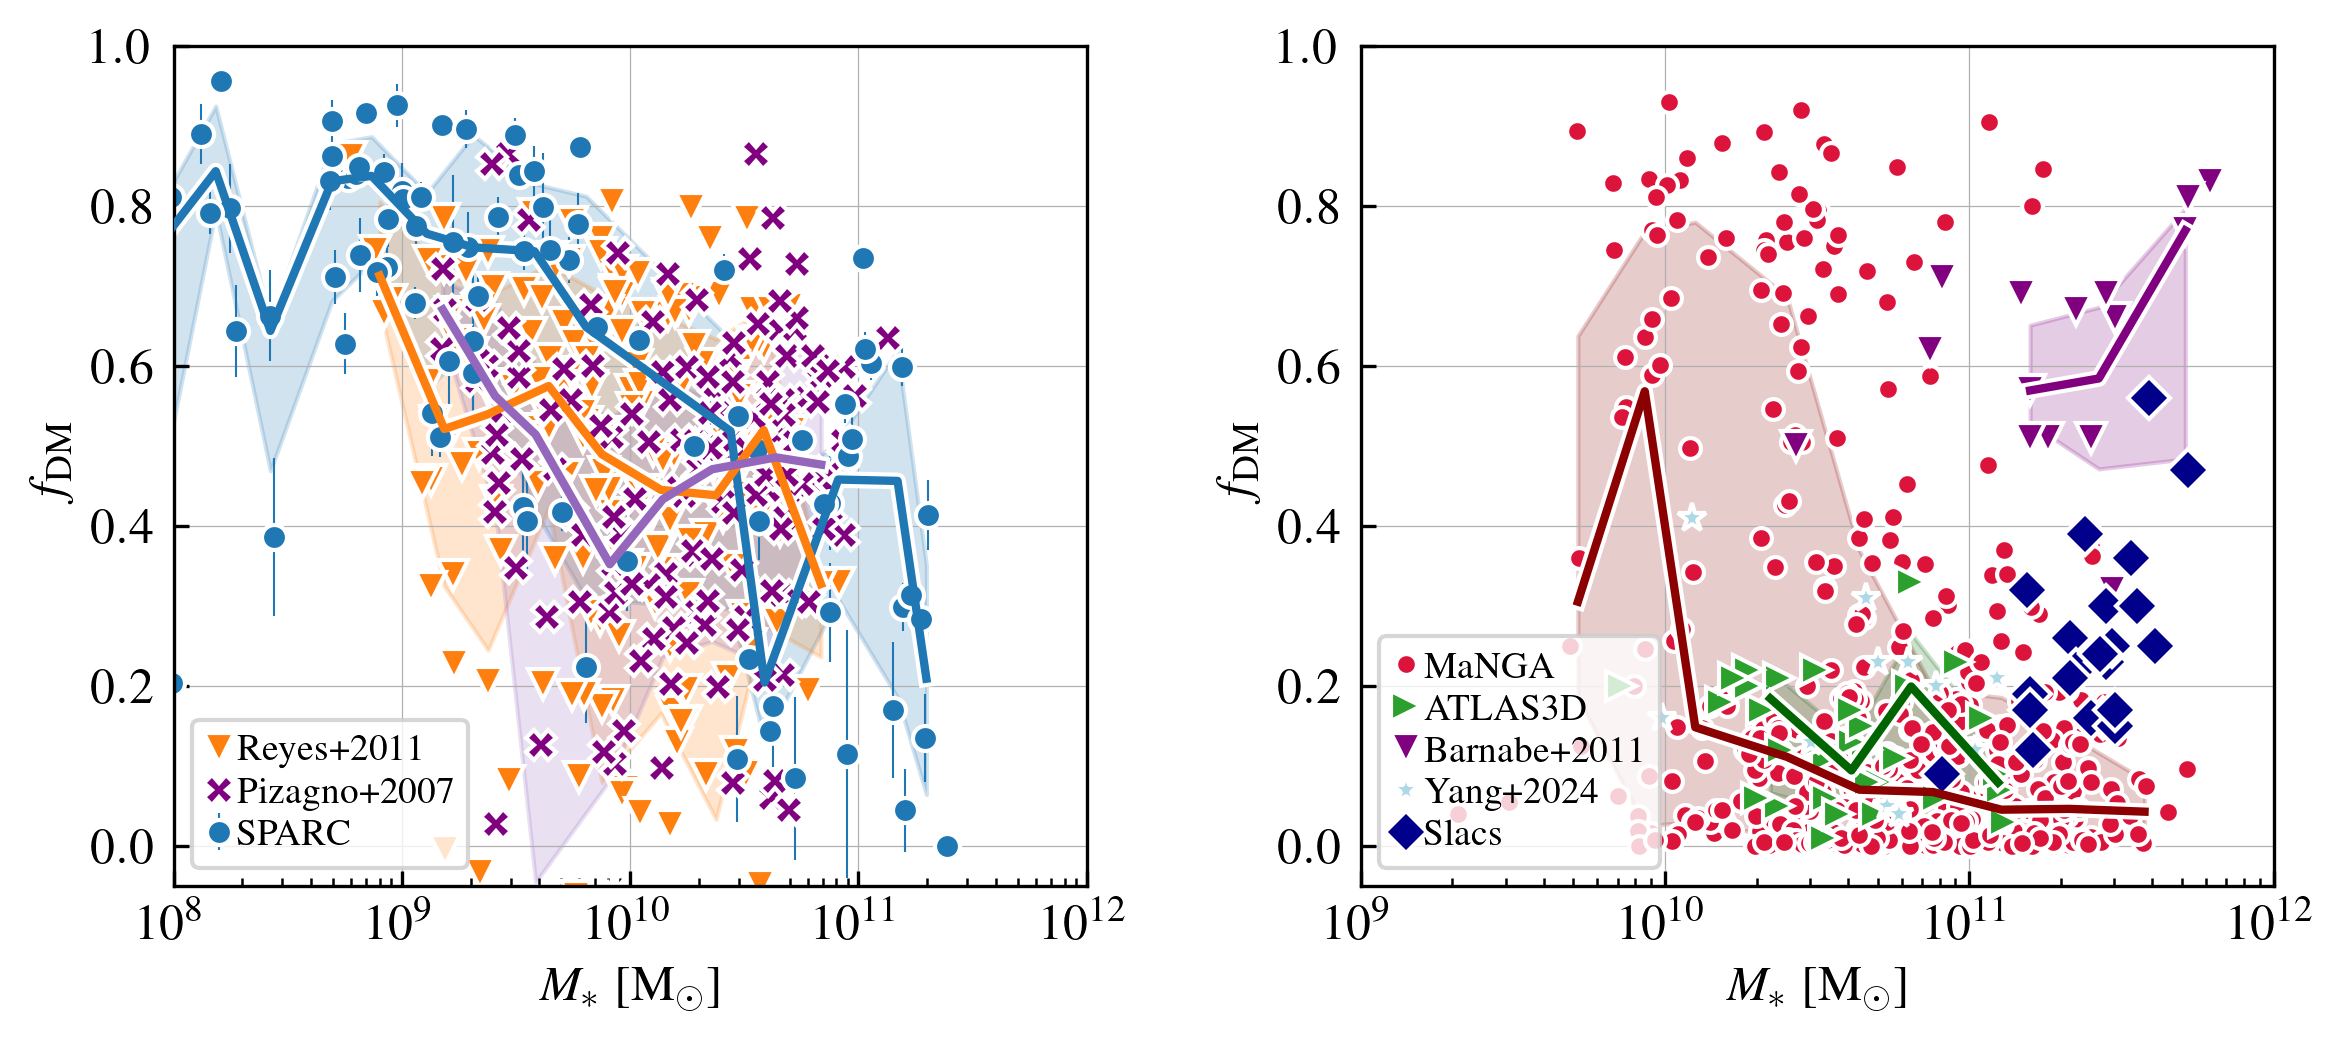

In [9]:
#################
# Plot parameters
params = {
    "font.size": 12,
    "font.family": "Times",
    "text.usetex": True,
    "figure.figsize": (10, 3.5),
    "figure.subplot.left": 0.25,
    "figure.subplot.right": 0.95,
    "figure.subplot.bottom": 0.15,
    "figure.subplot.top": 0.95,
    "figure.subplot.wspace": 0.3,
    "figure.subplot.hspace": 0.2,
    "lines.markersize": 2,
    "lines.linewidth": 1.5,
}
plt.rcParams.update(params)
plt.figure(dpi=300)
ax = plt.subplot(1, 2, 1)
plt.grid(linestyle='-', linewidth=0.3)

plt.errorbar(sparc_mass, sparc_fDM, yerr=sparc_ErrorfDM, marker='o', markersize=6, 
             markeredgecolor="white", ls='none', lw=0.5, c='tab:blue',label='SPARC')
plot_median(sparc_mass, sparc_fDM, 'SPARC', 'tab:blue')

plt.plot(reyes_mass, reyes_fDM, 'v', ms=7, color='tab:orange',markeredgecolor='white',lw=0.1,label='Reyes+2011')
plot_median(reyes_mass, reyes_fDM, 'Reyes', 'tab:orange')

plt.plot(pizagno_mass, pizagno_fDM, 'X', ms=7, color='purple',markeredgecolor='white',lw=0.1,label='Pizagno+2007')
plot_median(pizagno_mass, pizagno_fDM, 'Pizagno', 'tab:purple')

plt.axis([1e8, 1e12, -0.05, 1])
plt.xscale('log')
plt.ylabel(r"$f_{\mathrm{DM}}$")
plt.xlabel("$M_{*}$ [M$_{\odot}$]")
ax.tick_params(direction='in', axis='both', which='both', pad=4.5)

plt.legend(loc='lower left', labelspacing=0.2, handlelength=0.6, columnspacing=0.8,
           handletextpad=0.2, frameon=True, fontsize=9, ncol=1)


######
ax = plt.subplot(1, 2, 2)
plt.grid(linestyle='-', linewidth=0.3)

plt.plot(manga_mass, manga_fDM, 'o', ms=5, color='crimson',markeredgecolor='white',lw=0.1,label='MaNGA')
plot_median(manga_mass, manga_fDM, 'MaNGA', 'darkred')

plt.plot(atlas3D_mass, atlas3D_fDM, '>', ms=7, color='tab:green',markeredgecolor='white',lw=0.1,label='ATLAS3D')
plot_median(atlas3D_mass, atlas3D_fDM, 'ATLAS3D', 'darkgreen')

plt.plot(barnabe_mass, barnabe_fDM, 'v', ms=7, color='purple',markeredgecolor='white',lw=0.1,label='Barnabe+2011')
plot_median(barnabe_mass, barnabe_fDM, 'Barnabe+2011', 'purple')

plt.plot(Yang_mass, Yang_fDM, '*', ms=7, color='lightblue',markeredgecolor='white',lw=0.1,label='Yang+2024')
plt.plot(slacs_mass, slacs_fDM, 'D', ms=7, color='darkblue',markeredgecolor='white',lw=0.1,label='Slacs')

plt.axis([1e9, 1e12, -0.05, 1])
plt.xscale('log')
plt.ylabel(r"$f_{\mathrm{DM}}$")
plt.xlabel("$M_{*}$ [M$_{\odot}$]")
ax.tick_params(direction='in', axis='both', which='both', pad=4.5)

plt.legend(loc='lower left', labelspacing=0.2, handlelength=0.6, columnspacing=0.8,
           handletextpad=0.2, frameon=True, fontsize=9, ncol=1)


plt.show()

